# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [4]:
df= pd.read_csv('fires_data_11-29-2021.csv')
df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1990,1990,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
1,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1991,1991,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
2,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1992,1992,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
3,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1993,1993,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
4,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1994,1994,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN


# Shape of data

In [5]:
row, cols= df.shape
print("Number of rows:", row)
print("Number of columns:", cols)

Number of rows: 47649
Number of columns: 17


# Data types

In [6]:
df.dtypes

Domain Code          object
Domain               object
Area Code (ISO3)     object
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Source Code           int64
Source               object
Unit                 object
Value               float64
Flag                 object
Flag Description     object
Note                float64
dtype: object

# Check missing values

In [7]:
df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (ISO3)        0
Area                    0
Element Code            0
Element                 0
Item Code               0
Item                    0
Year Code               0
Year                    0
Source Code             0
Source                  0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                47649
dtype: int64

In [8]:
df.drop(['Note','Domain Code'], axis=1, inplace=True)

#### Dataset info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47649 entries, 0 to 47648
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain            47649 non-null  object 
 1   Area Code (ISO3)  47649 non-null  object 
 2   Area              47649 non-null  object 
 3   Element Code      47649 non-null  int64  
 4   Element           47649 non-null  object 
 5   Item Code         47649 non-null  int64  
 6   Item              47649 non-null  object 
 7   Year Code         47649 non-null  int64  
 8   Year              47649 non-null  int64  
 9   Source Code       47649 non-null  int64  
 10  Source            47649 non-null  object 
 11  Unit              47649 non-null  object 
 12  Value             47649 non-null  float64
 13  Flag              47649 non-null  object 
 14  Flag Description  47649 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 5.5+ MB


# Summery of data

In [10]:
df.describe()

,Element Code,Item Code,Year Code,Year,Source Code,Value
count,47649.0,47649.000000,47649.000000,47649.000000,47649.0,4.764900e+04
mean,7246.0,6788.428571,2004.636404,2004.636404,3050.0,4.120817e+05
std,0.0,11.890783,8.609612,8.609612,0.0,2.744637e+06
min,7246.0,6760.000000,1990.000000,1990.000000,3050.0,0.000000e+00
25%,7246.0,6789.000000,1997.000000,1997.000000,3050.0,0.000000e+00
50%,7246.0,6792.000000,2005.000000,2005.000000,3050.0,0.000000e+00
75%,7246.0,6796.000000,2012.000000,2012.000000,3050.0,5.514973e+03
max,7246.0,6797.000000,2019.000000,2019.000000,3050.0,1.052085e+08


# Value counts

In [11]:
df['Item'].value_counts()

Humid tropical forest    6807
Other forest             6807
Closed shrubland         6807
Grassland                6807
Open shrubland           6807
Savanna                  6807
Woody savanna            6807
Name: Item, dtype: int64

# Total land affected by fires in a year

In [12]:
s=df.groupby(["Year"]).sum().sort_values(by="Value", ascending=False).head(30)
s

,Element Code,Item Code,Year Code,Source Code,Value
Year,,,,,
2012,11666060,10929370,3239320,4910500,8.320688e+08
2007,11615338,10881851,3217221,4889150,8.303040e+08
2011,11615338,10881851,3223633,4889150,8.294422e+08
2002,11564616,10834332,3195192,4867800,8.285003e+08
2004,11564616,10834332,3198384,4867800,8.227932e+08
2005,11564616,10834332,3199980,4867800,7.998101e+08
2003,11564616,10834332,3196788,4867800,7.846035e+08
2006,11615338,10881851,3215618,4889150,7.715579e+08
2010,11615338,10881851,3222030,4889150,7.536716e+08


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009'),
  Text(20, 0, '2010'),
  Text(21, 0, '2011'),
  Text(22, 0, '2012'),
  Text(23, 0, '2013'),
  Text(24, 0, '2014'),
  Text(25, 0, '2015'),
  Text(26, 0, '2016'),
  Text(27, 0, '2017'),
  Text(28, 0, '2018'),
  Text(29, 0, '2019')])

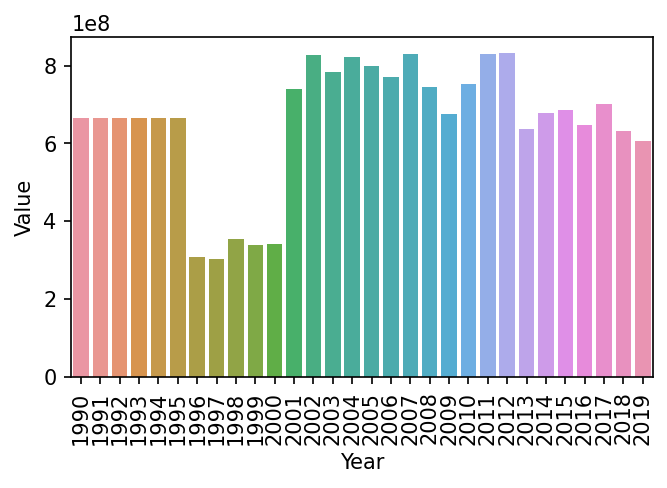

In [13]:
plt.figure(figsize=(5,3), dpi=150, linewidth=2)
sns.barplot(x=s.index,y='Value',data=s)
plt.xticks(rotation=90)

# Most land affected by fire in a country

In [14]:
a=df.groupby(["Area"]).sum().sort_values(by="Value", ascending=False)
a

,Element Code,Item Code,Year Code,Year,Source Code,Value
Area,,,,,,
Australia,1521660,1425570,420945,420945,640500,2.650662e+09
Angola,1521660,1425570,420945,420945,640500,1.927834e+09
Democratic Republic of the Congo,1521660,1425570,420945,420945,640500,1.698499e+09
Sudan (former),1115884,1045418,308077,308077,469700,1.304401e+09
Zambia,1521660,1425570,420945,420945,640500,1.204405e+09
...,...,...,...,...,...,...
Guam,1521660,1425570,420945,420945,640500,0.000000e+00
Bahrain,1521660,1425570,420945,420945,640500,0.000000e+00
Tokelau,1521660,1425570,420945,420945,640500,0.000000e+00


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

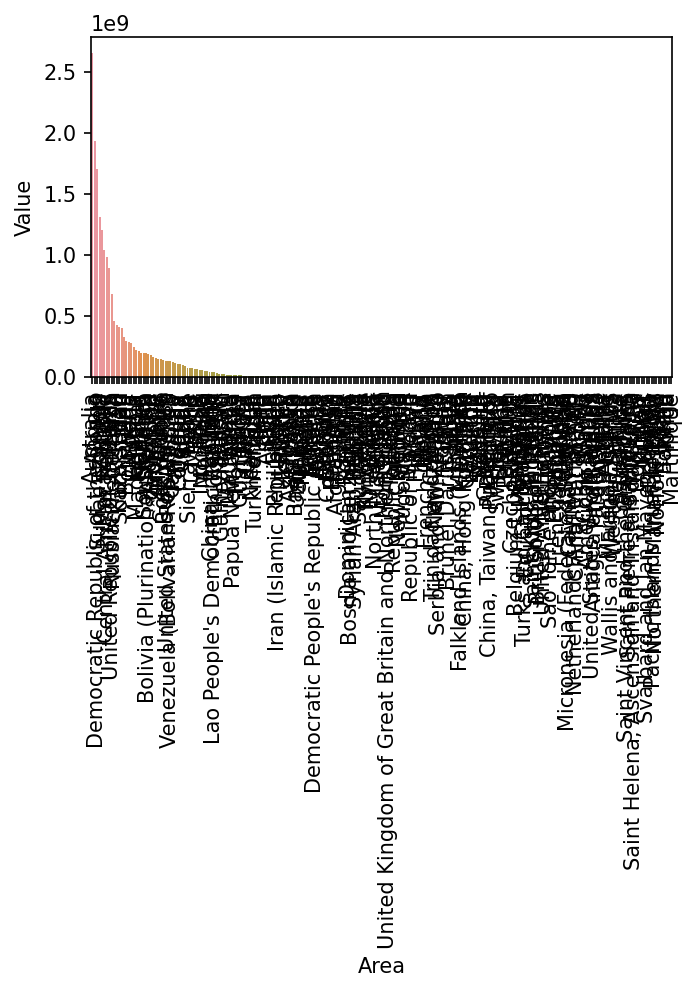

In [15]:
plt.figure(figsize=(5,3), dpi=150, linewidth=2)
sns.barplot(x=a.index,y='Value',data=a)
plt.xticks(rotation=90)

# Item burned most over years

In [16]:
b=df.groupby(["Item"]).sum().sort_values(by="Value", ascending=False)
b

,Element Code,Item Code,Year Code,Year,Source Code,Value
Item,,,,,,
Savanna,49323522,46015320,13645560,13645560,20761350,7.831523e+09
Grassland,49323522,46246758,13645560,13645560,20761350,6.801505e+09
Woody savanna,49323522,46212723,13645560,13645560,20761350,1.957280e+09
Open shrubland,49323522,46233144,13645560,13645560,20761350,1.365417e+09
Humid tropical forest,49323522,46260372,13645560,13645560,20761350,1.132681e+09
Other forest,49323522,46267179,13645560,13645560,20761350,4.478974e+08
Closed shrubland,49323522,46226337,13645560,13645560,20761350,9.897531e+07


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Savanna'),
  Text(1, 0, 'Grassland'),
  Text(2, 0, 'Woody savanna'),
  Text(3, 0, 'Open shrubland'),
  Text(4, 0, 'Humid tropical forest'),
  Text(5, 0, 'Other forest'),
  Text(6, 0, 'Closed shrubland')])

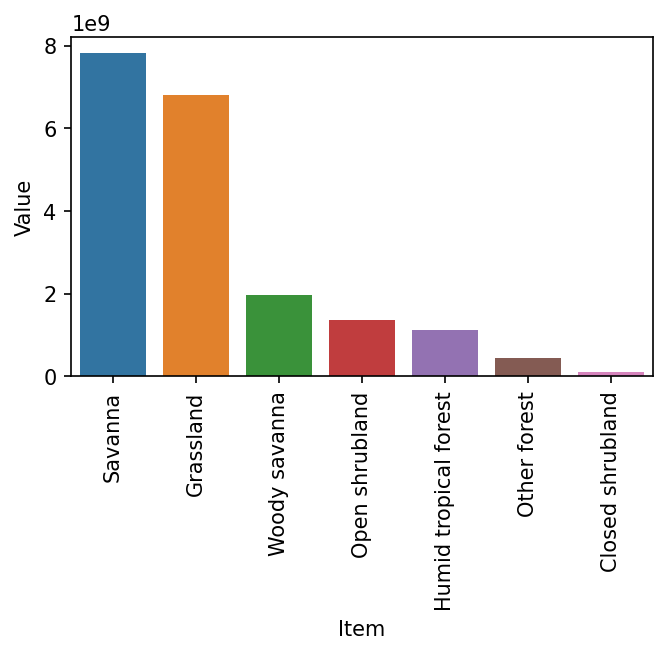

In [17]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=b.index,y='Value',data=b)
plt.xticks(rotation=90)

# Maximum area burned in a year in a country

In [18]:
c=df.groupby(["Year","Area"]).sum().sort_values(by="Value", ascending=False).head(30)
c

,,Element Code,Item Code,Year Code,Source Code,Value
Year,Area,,,,,
2001,Australia,50722,47519,14007,21350,1.840483e+08
2012,Australia,50722,47519,14084,21350,1.783090e+08
2011,Australia,50722,47519,14077,21350,1.737702e+08
2002,Australia,50722,47519,14014,21350,1.530490e+08
2004,Australia,50722,47519,14028,21350,1.255536e+08
2006,Australia,50722,47519,14042,21350,1.134671e+08
2007,Australia,50722,47519,14049,21350,1.025287e+08
2018,Australia,50722,47519,14126,21350,1.013396e+08
2017,Australia,50722,47519,14119,21350,9.615384e+07


# Item burned most in a year

In [19]:
a=df.groupby(["Year","Item"]).sum().sort_values(by="Value", ascending=False).head(30)
a

,,Element Code,Item Code,Year Code,Source Code,Value
Year,Item,,,,,
2005,Savanna,1652088,1541280,457140,695400,3.487667e+08
2003,Savanna,1652088,1541280,456684,695400,3.414789e+08
2007,Savanna,1659334,1548040,459603,698450,3.294614e+08
2004,Grassland,1652088,1549032,456912,695400,3.285651e+08
2002,Grassland,1652088,1549032,456456,695400,3.209670e+08
2007,Grassland,1659334,1555826,459603,698450,3.209456e+08
2008,Savanna,1659334,1548040,459832,698450,3.151744e+08
2010,Savanna,1659334,1548040,460290,698450,3.136204e+08
2004,Savanna,1652088,1541280,456912,695400,3.135659e+08


# Item burned in a country in a year

In [20]:
df.groupby(["Year","Area","Item"]).sum().sort_values(by="Value", ascending=False).head(30)

,,,Element Code,Item Code,Year Code,Source Code,Value
Year,Area,Item,,,,,
2011,Australia,Open shrubland,7246,6792,2011,3050,1.052085e+08
2012,Australia,Open shrubland,7246,6792,2012,3050,9.431891e+07
2001,Australia,Open shrubland,7246,6792,2001,3050,9.156779e+07
2002,Australia,Open shrubland,7246,6792,2002,3050,8.998342e+07
2001,Australia,Grassland,7246,6794,2001,3050,7.639979e+07
2004,Australia,Grassland,7246,6794,2004,3050,6.797964e+07
2012,Australia,Grassland,7246,6794,2012,3050,6.456851e+07
2011,Australia,Grassland,7246,6794,2011,3050,5.287709e+07
2017,Australia,Open shrubland,7246,6792,2017,3050,5.209256e+07


In [21]:
df.groupby("Area").agg(["min", "max", "mean"])

C:\Users\Maliha\AppData\Local\Temp\ipykernel_13704\2173121518.py:1: FutureWarning: ['Domain', 'Area Code (ISO3)', 'Element', 'Item', 'Source', 'Unit', 'Flag', 'Flag Description'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("Area").agg(["min", "max", "mean"])


Element Code               Item Code                     \
                        min   max    mean       min   max         mean   
Area                                                                     
Afghanistan            7246  7246  7246.0      6760  6797  6788.428571   
Albania                7246  7246  7246.0      6760  6797  6788.428571   
Algeria                7246  7246  7246.0      6760  6797  6788.428571   
American Samoa         7246  7246  7246.0      6760  6797  6788.428571   
Andorra                7246  7246  7246.0      6760  6797  6788.428571   
...                     ...   ...     ...       ...   ...          ...   
Western Sahara         7246  7246  7246.0      6760  6797  6788.428571   
Yemen                  7246  7246  7246.0      6760  6797  6788.428571   
Yugoslav SFR           7246  7246  7246.0      6760  6797  6788.428571   
Zambia                 7246  7246  7246.0      6760  6797  6788.428571   
Zimbabwe               7246  7246  7246.0      6760  6797  6788.428571   

               Year Code                Year               Source Code        \
                     min   max    mean   min   max    mean         min   max   
Area                                                                           
Afghanistan         1990  2019  2004.5  1990  2019  2004.5        3050  3050   
Albania             1990  2019  2004.5  1990  2019  2004.5        3050  3050   
Algeria             1990  2019  2004.5  1990  2019  2004.5        3050  3050   
American Samoa      1990  2019  2004.5  1990  2019  2004.5        3050  3050   
Andorra             1990  2019  2004.5  1990  2019  2004.5        3050  3050   
...                  ...   ...     ...   ...   ...     ...         ...   ...   
Western Sahara      1990  2019  2004.5  1990  2019  2004.5        3050  3050   
Yemen               1990  2019  2004.5  1990  2019  2004.5        3050  3050   
Yugoslav SFR        1990  1991  1990.5  1990  1991  1990.5        3050  3050   
Zambia              1990  2019  2004.5  1990  2019  2004.5        3050  3050   
Zimbabwe            1990  2019  2004.5  1990  2019  2004.5        3050  3050   

                            Value                              
                  mean        min           max          mean  
Area                                                           
Afghanistan     3050.0     0.0000  2.254087e+05  4.784936e+03  
Albania         3050.0     0.0000  1.019093e+05  3.268111e+03  
Algeria         3050.0     0.0000  2.527415e+05  1.978086e+04  
American Samoa  3050.0     0.0000  0.000000e+00  0.000000e+00  
Andorra         3050.0     0.0000  0.000000e+00  0.000000e+00  
...                ...        ...           ...           ...  
Western Sahara  3050.0     0.0000  0.000000e+00  0.000000e+00  
Yemen           3050.0     0.0000  1.283223e+02  2.648193e+00  
Yugoslav SFR    3050.0     0.0000  3.824778e+04  9.658496e+03  
Zambia          3050.0  2737.5183  2.820653e+07  5.735263e+06  
Zimbabwe        3050.0     0.0000  6.943403e+06  7.475783e+05  

[238 rows x 18 columns]

# Fire data for selected countries

In [31]:
df_selected = df[df["Area"].isin(["India", "Afghanistan", "Pakistan","Nepal","Bangladesh","Bhutan"])]

In [32]:
df_selected.head()

,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description
0,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1990,1990,3050,FAO TIER 1,ha,0.0,Fc,Calculated data
1,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1991,1991,3050,FAO TIER 1,ha,0.0,Fc,Calculated data
2,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1992,1992,3050,FAO TIER 1,ha,0.0,Fc,Calculated data
3,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1993,1993,3050,FAO TIER 1,ha,0.0,Fc,Calculated data
4,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1994,1994,3050,FAO TIER 1,ha,0.0,Fc,Calculated data


In [33]:
df_selected.describe()

,Element Code,Item Code,Year Code,Year,Source Code,Value
count,1260.0,1260.000000,1260.000000,1260.000000,1260.0,1.260000e+03
mean,7246.0,6788.428571,2004.500000,2004.500000,3050.0,6.258913e+04
std,0.0,11.895380,8.658878,8.658878,0.0,2.081090e+05
min,7246.0,6760.000000,1990.000000,1990.000000,3050.0,0.000000e+00
25%,7246.0,6789.000000,1997.000000,1997.000000,3050.0,0.000000e+00
50%,7246.0,6792.000000,2004.500000,2004.500000,3050.0,9.374615e+02
75%,7246.0,6796.000000,2012.000000,2012.000000,3050.0,1.252533e+04
max,7246.0,6797.000000,2019.000000,2019.000000,3050.0,2.609465e+06


In [34]:
df_selected.groupby("Area").sum().sort_values(by="Value", ascending=False)

,Element Code,Item Code,Year Code,Year,Source Code,Value
Area,,,,,,
India,1521660,1425570,420945,420945,640500,6.546250e+07
Nepal,1521660,1425570,420945,420945,640500,8.490565e+06
Bangladesh,1521660,1425570,420945,420945,640500,2.536032e+06
Pakistan,1521660,1425570,420945,420945,640500,1.015368e+06
Afghanistan,1521660,1425570,420945,420945,640500,1.004836e+06
Bhutan,1521660,1425570,420945,420945,640500,3.529995e+05


<AxesSubplot:xlabel='Year', ylabel='Value'>

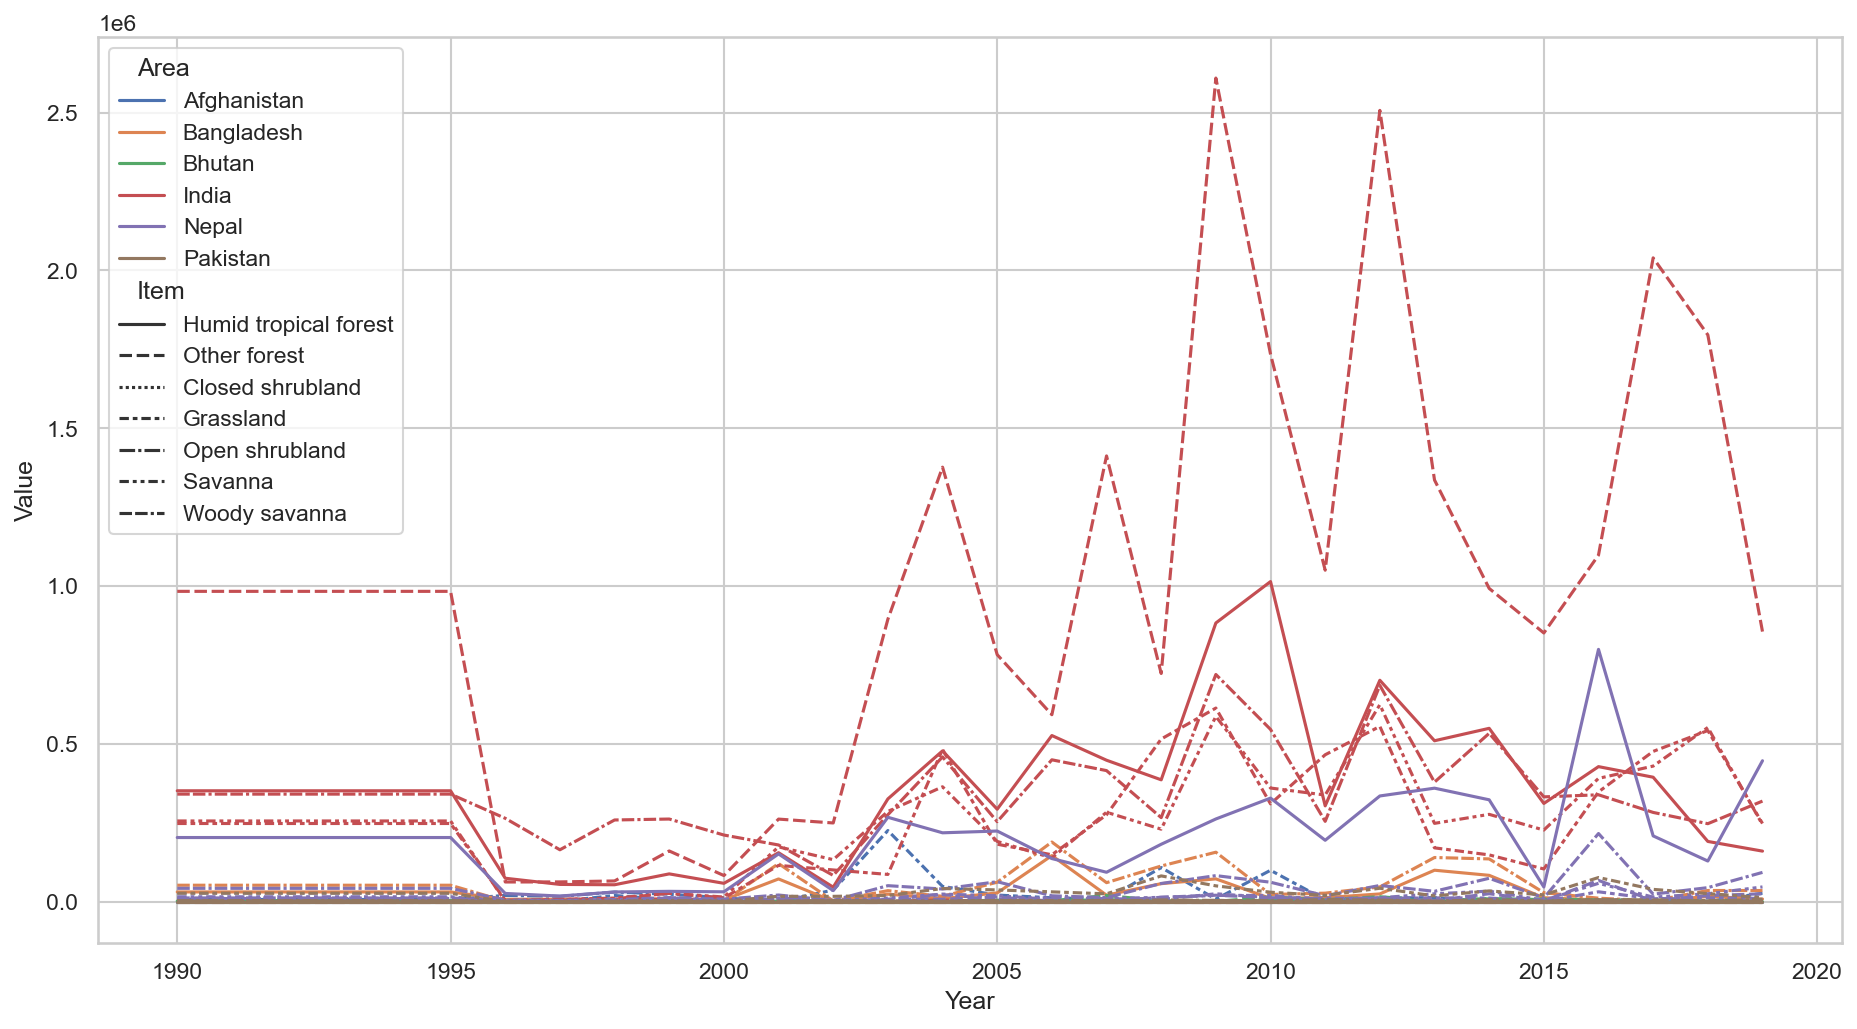

In [54]:
plt.figure(figsize=(15,8), dpi=150)
sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.lineplot(x="Year",y="Value",hue="Area",style="Item",data=df_selected)

In [42]:
df_selected.groupby("Item").sum().sort_values(by="Value", ascending=False)

,Element Code,Item Code,Year Code,Year,Source Code,Value
Item,,,,,,
Other forest,1304280,1223460,360810,360810,549000,3.001489e+07
Humid tropical forest,1304280,1223280,360810,360810,549000,1.761853e+07
Woody savanna,1304280,1222020,360810,360810,549000,1.318119e+07
Grassland,1304280,1222920,360810,360810,549000,9.423115e+06
Savanna,1304280,1216800,360810,360810,549000,8.245538e+06
Open shrubland,1304280,1222560,360810,360810,549000,3.124074e+05
Closed shrubland,1304280,1222380,360810,360810,549000,6.663701e+04


In [58]:
df_selected.groupby("Year").sum().sort_values(by="Value", ascending=False)

,Element Code,Item Code,Year Code,Source Code,Value
Year,,,,,
2009,304332,285114,84378,128100,6.127638e+06
2012,304332,285114,84504,128100,5.675934e+06
2010,304332,285114,84420,128100,4.599665e+06
2017,304332,285114,84714,128100,3.950377e+06
2016,304332,285114,84672,128100,3.900596e+06
2018,304332,285114,84756,128100,3.649834e+06
2004,304332,285114,84168,128100,3.605954e+06
2013,304332,285114,84546,128100,3.361002e+06
2014,304332,285114,84588,128100,3.258289e+06


In [56]:
df_selected.groupby(["Area","Item"]).sum().sort_values(by="Value", ascending=False)

Element Code  Item Code  Year Code   Year  \
Area        Item                                                               
India       Other forest                 217380     203910      60135  60135   
            Humid tropical forest        217380     203880      60135  60135   
            Woody savanna                217380     203670      60135  60135   
            Savanna                      217380     202800      60135  60135   
            Grassland                    217380     203820      60135  60135   
Nepal       Humid tropical forest        217380     203880      60135  60135   
Bangladesh  Woody savanna                217380     203670      60135  60135   
Nepal       Woody savanna                217380     203670      60135  60135   
Bangladesh  Humid tropical forest        217380     203880      60135  60135   
Afghanistan Grassland                    217380     203820      60135  60135   
Pakistan    Grassland                    217380     203820      60135  60135   
Nepal       Savanna                      217380     202800      60135  60135   
            Other forest                 217380     203910      60135  60135   
            Grassland                    217380     203820      60135  60135   
Afghanistan Open shrubland               217380     203760      60135  60135   
Bhutan      Other forest                 217380     203910      60135  60135   
            Woody savanna                217380     203670      60135  60135   
Pakistan    Open shrubland               217380     203760      60135  60135   
India       Open shrubland               217380     203760      60135  60135   
Pakistan    Savanna                      217380     202800      60135  60135   
Bhutan      Humid tropical forest        217380     203880      60135  60135   
            Grassland                    217380     203820      60135  60135   
India       Closed shrubland             217380     203730      60135  60135   
Bangladesh  Savanna                      217380     202800      60135  60135   
Pakistan    Other forest                 217380     203910      60135  60135   
            Closed shrubland             217380     203730      60135  60135   
Bangladesh  Grassland                    217380     203820      60135  60135   
Pakistan    Woody savanna                217380     203670      60135  60135   
Bhutan      Savanna                      217380     202800      60135  60135   
Nepal       Closed shrubland             217380     203730      60135  60135   
Afghanistan Closed shrubland             217380     203730      60135  60135   
            Savanna                      217380     202800      60135  60135   
Bhutan      Open shrubland               217380     203760      60135  60135   
Afghanistan Woody savanna                217380     203670      60135  60135   
Nepal       Open shrubland               217380     203760      60135  60135   
Bhutan      Closed shrubland             217380     203730      60135  60135   
Afghanistan Other forest                 217380     203910      60135  60135   
Bangladesh  Closed shrubland             217380     203730      60135  60135   
            Open shrubland               217380     203760      60135  60135   
            Other forest                 217380     203910      60135  60135   
Pakistan    Humid tropical forest        217380     203880      60135  60135   
Afghanistan Humid tropical forest        217380     203880      60135  60135   

                                   Source Code         Value  
Area        Item                                              
India       Other forest                 91500  2.949751e+07  
            Humid tropical forest        91500  1.054195e+07  
            Woody savanna                91500  1.022475e+07  
            Savanna                      91500  7.673059e+06  
            Grassland                    91500  7.432449e+06  
Nepal       Humid tropical forest        91500  6.098553e+06  
Bangladesh